In [2]:
#Load sample from monthly folders (local, 300 per month)
# =========================================================
import os
import pandas as pd

# Get the directory where the script is located
base_dir = os.getcwd()

# Initialize list to collect dataframes
sampled_dfs = []

# Loop through subfolders in the current directory
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)

    # Skip if not a directory or not a month folder
    if not os.path.isdir(folder_path) or " " not in folder:
        continue

    csv_path = os.path.join(folder_path, "T_ONTIME_REPORTING.csv")

    if os.path.exists(csv_path):
        try:
            df_m = pd.read_csv(csv_path)

            # Sample 300 or all if less
            sample_size = min(300, len(df_m))
            sampled = df_m.sample(n=sample_size, random_state=42)

            sampled_dfs.append(sampled)

        except Exception as e:
            print(f"Error reading {csv_path}: {e}")

# Combine all samples
if sampled_dfs:
    df = pd.concat(sampled_dfs, ignore_index=True)
    print(df.head())
else:
    print("No data sampled.")
df


   YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK                FL_DATE  \
0  2024        3      7             6            6   7/6/2024 12:00:00 AM   
1  2024        3      7            27            6  7/27/2024 12:00:00 AM   
2  2024        3      7            10            3  7/10/2024 12:00:00 AM   
3  2024        3      7            11            4  7/11/2024 12:00:00 AM   
4  2024        3      7             6            6   7/6/2024 12:00:00 AM   

   OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN ORIGIN_STATE_NM  ...  \
0              422.0              11057    CLT  North Carolina  ...   
1             3358.0              14869    SLC            Utah  ...   
2             1713.0              10397    ATL         Georgia  ...   
3             2134.0              14307    PVD    Rhode Island  ...   
4             1600.0              14908    SNA      California  ...   

          DEST_CITY_NAME  DEST_STATE_NM  CRS_DEP_TIME DEP_TIME CRS_ARR_TIME  \
0  Dallas/Fort Worth, TX       

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_STATE_NM,...,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME,ARR_TIME,ARR_DEL15,ARR_TIME_BLK,FLIGHTS,DISTANCE
0,2024,3,7,6,6,7/6/2024 12:00:00 AM,422.0,11057,CLT,North Carolina,...,"Dallas/Fort Worth, TX",Texas,726,728.0,914,932.0,1.0,0900-0959,1.0,936.0
1,2024,3,7,27,6,7/27/2024 12:00:00 AM,3358.0,14869,SLC,Utah,...,"Las Vegas, NV",Nevada,2025,2019.0,2050,2034.0,0.0,2000-2059,1.0,368.0
2,2024,3,7,10,3,7/10/2024 12:00:00 AM,1713.0,10397,ATL,Georgia,...,"El Paso, TX",Texas,2035,2054.0,2138,2154.0,1.0,2100-2159,1.0,1282.0
3,2024,3,7,11,4,7/11/2024 12:00:00 AM,2134.0,14307,PVD,Rhode Island,...,"Washington, DC",Virginia,1720,1746.0,1855,1900.0,0.0,1800-1859,1.0,356.0
4,2024,3,7,6,6,7/6/2024 12:00:00 AM,1600.0,14908,SNA,California,...,"Provo, UT",Utah,1527,1522.0,1808,1805.0,0.0,1800-1859,1.0,565.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,2024,4,10,10,4,10/10/2024 12:00:00 AM,2523.0,11278,DCA,Virginia,...,"Orlando, FL",Florida,2000,NaN,2224,NaN,NaN,2200-2259,1.0,759.0
3596,2024,4,10,8,2,10/8/2024 12:00:00 AM,1522.0,10397,ATL,Georgia,...,"Columbus, OH",Ohio,1021,1016.0,1152,1143.0,0.0,1100-1159,1.0,447.0
3597,2024,4,10,25,5,10/25/2024 12:00:00 AM,3077.0,11292,DEN,Colorado,...,"Kansas City, MO",Missouri,1400,1401.0,1635,1632.0,0.0,1600-1659,1.0,533.0
3598,2024,4,10,19,6,10/19/2024 12:00:00 AM,1731.0,14869,SLC,Utah,...,"Los Angeles, CA",California,1046,1115.0,1140,1153.0,0.0,1100-1159,1.0,590.0


In [3]:
# Prepare Data for GB Classification
# =========================================================

import numpy as np
import pandas as pd

# Helper function: Convert HHMM → minutes since midnight
def hhmm_to_minutes(x):
    """Converts HHMM time (e.g., 1325) to minutes since midnight (0–1439)."""
    try:
        s = str(x).strip()
        if s == "" or s.lower() in {"nan", "none"}:
            return np.nan
        v = int(float(s))
        h, m = v // 100, v % 100
        if h < 0 or h > 23 or m < 0 or m > 59:
            return np.nan
        return h * 60 + m
    except:
        return np.nan

# Ensure DEP_DELAY exists (if not, create it)
if "DEP_DELAY" not in df.columns:
    if {"DEP_TIME", "CRS_DEP_TIME"}.issubset(df.columns):
        df["DEP_TIME_MIN"] = df["DEP_TIME"].apply(hhmm_to_minutes)
        df["CRS_DEP_TIME_MIN"] = df["CRS_DEP_TIME"].apply(hhmm_to_minutes)
        df["DEP_DELAY"] = df["DEP_TIME_MIN"] - df["CRS_DEP_TIME_MIN"]
        print("'DEP_DELAY' column created from DEP_TIME and CRS_DEP_TIME.")
    else:
        print("Missing columns: Cannot calculate DEP_DELAY.")
else:
    print("'DEP_DELAY' already exists in dataset.")

# Create binary target variable dep_delay_15
if "DEP_DELAY" in df.columns:
    df = df[~df["DEP_DELAY"].isna()].copy()
    df["dep_delay_15"] = (df["DEP_DELAY"] > 15).astype(int)
    print("Target variable 'dep_delay_15' created (1 = delay > 15 min).")
    print(f"Remaining rows after cleaning: {len(df)}")
else:
    print("Could not create 'dep_delay_15' (no DEP_DELAY column).")

# Create cyclic time features (sin/cos encoding for CRS_DEP_TIME_MIN)
if "CRS_DEP_TIME_MIN" not in df.columns and "CRS_DEP_TIME" in df.columns:
    df["CRS_DEP_TIME_MIN"] = df["CRS_DEP_TIME"].apply(hhmm_to_minutes)

if "CRS_DEP_TIME_MIN" in df.columns:
    df["DEP_TIME_sin"] = np.sin(2 * np.pi * df["CRS_DEP_TIME_MIN"] / 1440)
    df["DEP_TIME_cos"] = np.cos(2 * np.pi * df["CRS_DEP_TIME_MIN"] / 1440)
    print("Cyclic time features 'DEP_TIME_sin' and 'DEP_TIME_cos' created.")
else:
    print("Missing CRS_DEP_TIME_MIN — cannot create cyclic features.")

# Preview relevant columns
try:
    display(df[["DEP_DELAY", "dep_delay_15", "DEP_TIME_sin", "DEP_TIME_cos"]].head())
except:
    print(df[["DEP_DELAY", "dep_delay_15", "DEP_TIME_sin", "DEP_TIME_cos"]].head())


'DEP_DELAY' column created from DEP_TIME and CRS_DEP_TIME.
Target variable 'dep_delay_15' created (1 = delay > 15 min).
Remaining rows after cleaning: 3539
Cyclic time features 'DEP_TIME_sin' and 'DEP_TIME_cos' created.


,DEP_DELAY,dep_delay_15,DEP_TIME_sin,DEP_TIME_cos
0,2.0,0,0.930418,-0.366501
1,-6.0,0,-0.806445,0.591310
2,19.0,1,-0.779884,0.625923
3,26.0,1,-0.984808,-0.173648
4,-5.0,0,-0.785317,-0.619094


In [4]:
#Convert departure times into 15-minute bins and prepare the dataset for GB Classification
# =========================================================

import pandas as pd

# Ensure DEP_TIME_MIN exists if DEP_TIME is available (needed for bins)
if "DEP_TIME_MIN" not in df.columns and "DEP_TIME" in df.columns:
    df["DEP_TIME_MIN"] = df["DEP_TIME"].apply(hhmm_to_minutes)

# Create 15-minute time bins
if "DEP_TIME_MIN" in df.columns:
    df["DEP_TIME_BIN"] = pd.cut(
        df["DEP_TIME_MIN"],
        bins=range(0, 1441, 15),
        labels=[f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 15)]
    )
    print("\n 'DEP_TIME_BIN' (15-minute categories) created successfully.")
    try:
        display(df[["DEP_TIME_MIN", "DEP_TIME_BIN"]].head())
    except:
        print(df[["DEP_TIME_MIN", "DEP_TIME_BIN"]].head())
else:
    print(" Missing column 'DEP_TIME_MIN' — cannot create 15-minute bins.")

# Define features (independent variables)
selected_features = [
    "DEP_TIME_BIN",        # Time slot (categorical)
    "DAY_OF_WEEK",         # Day of the week (1–7)
    "ORIGIN_AIRPORT_ID",   # Numeric airport ID for origin
    "ORIGIN",              # Origin airport code
    "DEST"                 # Destination airport code
]

# Ensure the target variable exists
if "dep_delay_15" not in df.columns:
    raise ValueError("Target variable 'dep_delay_15' not found. Please run the target creation cell first.")

# Minimal filtering
df_model = df.dropna(subset=["dep_delay_15"]).copy()

for col in selected_features:
    if col not in df_model.columns:
        print(f"Warning: Missing feature column '{col}' — will be ignored.")
        selected_features = [c for c in selected_features if c in df_model.columns]

# Separate predictors (X) and target (y)
X = df_model[selected_features]
y = df_model["dep_delay_15"]

# Output summary 
print(f"\n Final dataset ready for modeling: {len(X)} rows, {len(selected_features)} features.")
try:
    display(X.head())
except:
    print(X.head())



 'DEP_TIME_BIN' (15-minute categories) created successfully.


,DEP_TIME_MIN,DEP_TIME_BIN
0,448.0,07:15
1,1219.0,20:15
2,1254.0,20:45
3,1066.0,17:45
4,922.0,15:15



 Final dataset ready for modeling: 3539 rows, 5 features.


,DEP_TIME_BIN,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,ORIGIN,DEST
0,07:15,6,11057,CLT,DFW
1,20:15,6,14869,SLC,LAS
2,20:45,3,10397,ATL,ELP
3,17:45,4,14307,PVD,DCA
4,15:15,6,14908,SNA,PVU


In [4]:
# STEP 3: Split + preprocessing 
# =========================================================
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import numpy as np

cat_features = [c for c in ["DEP_TIME_BIN", "ORIGIN", "DEST"] if c in X.columns]
num_features = [c for c in ["DAY_OF_WEEK", "ORIGIN_AIRPORT_ID"] if c in X.columns]

# Single random split (60/20/20 via two splits)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.25, stratify=y_train, random_state=42
)

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), cat_features),
        ("num", "passthrough", num_features),
    ],
    remainder="drop",
)


Baseline threshold (cost_fp=1.0, cost_fn=3.0): 0.550

=== Baseline GB — Test Metrics ===
PR-AUC:  0.2860
ROC-AUC: 0.6370
F1:      0.3026

Classification report:
               precision    recall  f1-score   support

           0     0.8284    0.8415    0.8349       568
           1     0.3130    0.2929    0.3026       140

    accuracy                         0.7331       708
   macro avg     0.5707    0.5672    0.5688       708
weighted avg     0.7265    0.7331    0.7297       708

Confusion matrix:
 [[478  90]
 [ 99  41]]


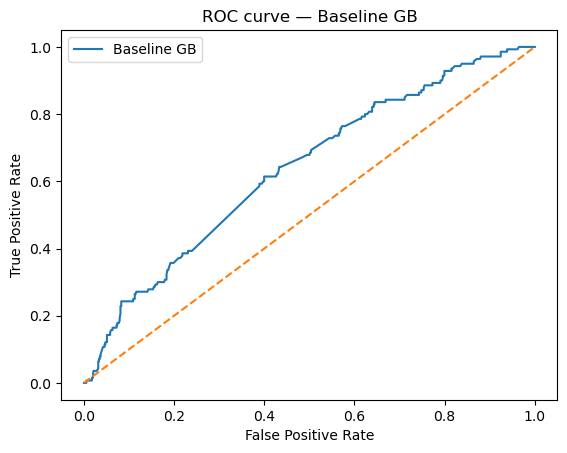

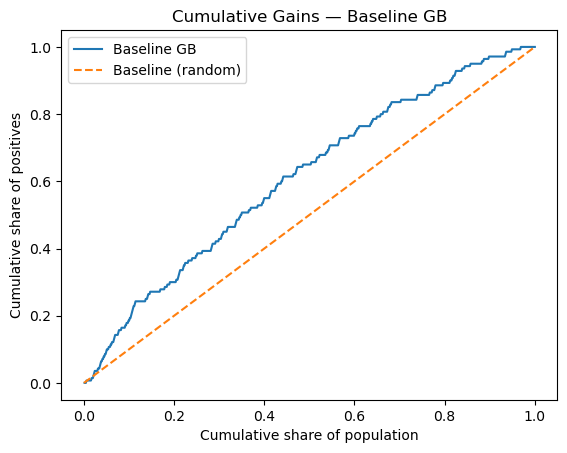


Lift by decile (Baseline GB):
decile
1     1.851911
2     1.495775
3     1.424547
4     1.375972
5     1.300000
6     1.237513
7     1.195325
8     1.116860
9     1.079704
10    1.000000
Name: lift, dtype: float64

Threshold trade-offs (Baseline GB):


,threshold,precision,recall,f1,FP,FN
0,0.30,0.219224,0.928571,0.354707,463,10
1,0.50,0.272152,0.614286,0.377193,230,54
2,0.55,0.312977,0.292857,0.302583,90,99


In [5]:
# STEP 4: Baseline GB — metrics, ROC, gains/lift, trade-offs
# =========================================================
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    average_precision_score, roc_auc_score, f1_score, precision_recall_curve,
    classification_report, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Handle class imbalance by inverse frequency
class_counts = Counter(y_tr)
w_pos = len(y_tr) / (2.0 * class_counts.get(1, 1))
w_neg = len(y_tr) / (2.0 * class_counts.get(0, 1))
sample_weight_tr = np.where(y_tr == 1, w_pos, w_neg)

baseline = Pipeline(steps=[
    ("prep", preprocess),
    ("gb", GradientBoostingClassifier(random_state=42))
])
baseline.fit(X_tr, y_tr, gb__sample_weight=sample_weight_tr)

# Cost-sensitive threshold selection
COST_FP = 1.0
COST_FN = 3.0

def pick_threshold_by_cost(y_true, p, cost_fp=1.0, cost_fn=3.0):
    best_thr, best_util = 0.5, -1e18
    for t in np.linspace(0.05, 0.95, 19):
        yhat = (p >= t).astype(int)
        fp = np.sum((yhat==1) & (y_true==0))
        fn = np.sum((yhat==0) & (y_true==1))
        util = -(cost_fp*fp + cost_fn*fn)
        if util > best_util:
            best_util, best_thr = util, t
    return best_thr

val_proba = baseline.predict_proba(X_val)[:, 1]
thr_cost = pick_threshold_by_cost(y_val.values, val_proba, COST_FP, COST_FN)
print(f"Baseline threshold (cost_fp={COST_FP}, cost_fn={COST_FN}): {thr_cost:.3f}")

# Test predictions
test_proba = baseline.predict_proba(X_test)[:, 1]
test_pred = (test_proba >= thr_cost).astype(int)

print("\n=== Baseline GB — Test Metrics ===")
print(f"PR-AUC:  {average_precision_score(y_test, test_proba):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, test_proba):.4f}")
print(f"F1:      {f1_score(y_test, test_pred):.4f}")
print("\nClassification report:\n", classification_report(y_test, test_pred, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, test_pred))

# ROC curve (demonstration)
fpr, tpr, _ = roc_curve(y_test, test_proba)
plt.figure()
plt.plot(fpr, tpr, label="Baseline GB")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve — Baseline GB")
plt.legend()
plt.show()

# Cumulative gains / lift
def cumulative_gains(y_true, p):
    dfp = pd.DataFrame({"y": y_true, "p": p}).sort_values("p", ascending=False).reset_index(drop=True)
    dfp["cum_positives"] = dfp["y"].cumsum()
    total_pos = dfp["y"].sum()
    total = len(dfp)
    dfp["perc_population"] = (np.arange(1, total+1)) / total
    dfp["perc_positives"] = dfp["cum_positives"] / (total_pos if total_pos>0 else 1)
    dfp["lift"] = dfp["perc_positives"] / dfp["perc_population"].replace(0, np.nan)
    return dfp

gains_baseline = cumulative_gains(y_test.values, test_proba)

# Gains plot
plt.figure()
plt.plot(gains_baseline["perc_population"], gains_baseline["perc_positives"], label="Baseline GB")
plt.plot([0,1],[0,1], linestyle="--", label="Baseline (random)")
plt.xlabel("Cumulative share of population")
plt.ylabel("Cumulative share of positives")
plt.title("Cumulative Gains — Baseline GB")
plt.legend()
plt.show()

# Lift by deciles
gains_baseline["decile"] = pd.qcut(gains_baseline["perc_population"], 10, labels=False)+1
lift_by_decile = gains_baseline.groupby("decile")["lift"].last()
print("\nLift by decile (Baseline GB):")
print(lift_by_decile)

# Threshold trade-offs table
from sklearn.metrics import precision_score, recall_score

def tradeoff_table(y_true, p, thresholds):
    rows = []
    for t in thresholds:
        yhat = (p >= t).astype(int)
        prec = precision_score(y_true, yhat, zero_division=0)
        rec = recall_score(y_true, yhat)
        f1 = f1_score(y_true, yhat)
        cm = confusion_matrix(y_true, yhat)
        tn, fp, fn, tp = cm.ravel()
        rows.append({"threshold": round(t,3),"precision":prec,"recall":rec,"f1":f1,"FP":fp,"FN":fn})
    return pd.DataFrame(rows).sort_values("threshold")

thr_grid = [0.3, 0.5, thr_cost]
tradeoffs_baseline = tradeoff_table(y_test.values, test_proba, thr_grid)
print("\nThreshold trade-offs (Baseline GB):")
display(tradeoffs_baseline)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best PR-AUC (CV): 0.3213340417027256
Best params: {'gb__learning_rate': np.float64(0.19756057719880213), 'gb__max_depth': 5, 'gb__max_features': 'sqrt', 'gb__min_samples_leaf': 4, 'gb__min_samples_split': 8, 'gb__n_estimators': 322, 'gb__subsample': np.float64(0.8424136140153511)}
Optimized threshold (cost_fp=1.0, cost_fn=3.0): 0.500

=== Optimized GB — Test Metrics ===
PR-AUC:  0.2684
ROC-AUC: 0.6117
F1:      0.3568

Classification report:
               precision    recall  f1-score   support

           0     0.8483    0.6303    0.7232       568
           1     0.2657    0.5429    0.3568       140

    accuracy                         0.6130       708
   macro avg     0.5570    0.5866    0.5400       708
weighted avg     0.7331    0.6130    0.6508       708

Confusion matrix:
 [[358 210]
 [ 64  76]]


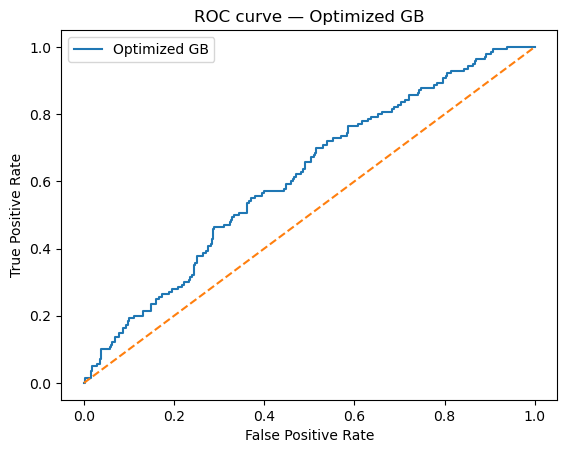

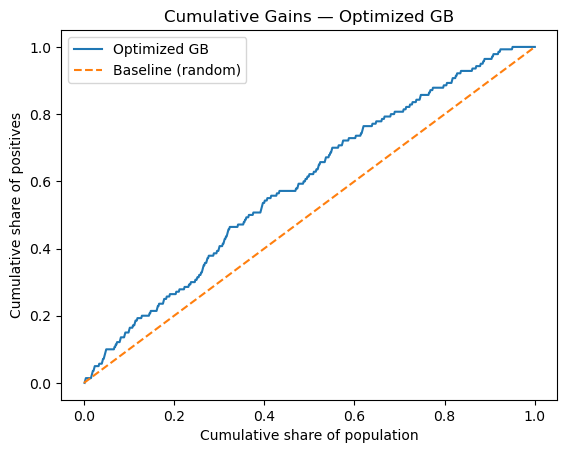


Lift by decile (Optimized GB):
decile
1     1.567002
2     1.317706
3     1.353320
4     1.340232
5     1.242857
6     1.213714
7     1.154459
8     1.107925
9     1.071765
10    1.000000
Name: lift, dtype: float64

Threshold trade-offs (Optimized GB):


,threshold,precision,recall,f1,FP,FN
0,0.3,0.243182,0.764286,0.368966,333,33
1,0.5,0.265734,0.542857,0.356808,210,64
2,0.5,0.265734,0.542857,0.356808,210,64


In [6]:
# Optimized GB (RandomizedSearchCV) + ROC, gains/lift, trade-offs
# =========================================================
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from scipy.stats import randint, uniform

gb_pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("gb", GradientBoostingClassifier(random_state=42))
])

param_dist = {
    "gb__n_estimators": randint(120, 500),
    "gb__learning_rate": uniform(0.03, 0.17),
    "gb__max_depth": randint(2, 6),
    "gb__min_samples_split": randint(2, 12),
    "gb__min_samples_leaf": randint(1, 10),
    "gb__subsample": uniform(0.75, 0.25),
    "gb__max_features": ["sqrt", None]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=gb_pipe,
    param_distributions=param_dist,
    n_iter=30,
    scoring="average_precision",
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

search.fit(X_tr, y_tr, gb__sample_weight=sample_weight_tr)

print("Best PR-AUC (CV):", search.best_score_)
print("Best params:", search.best_params_)

best_gb = search.best_estimator_

# Cost-sensitive threshold on validation
val_proba_opt = best_gb.predict_proba(X_val)[:, 1]
thr_cost_opt = pick_threshold_by_cost(y_val.values, val_proba_opt, COST_FP, COST_FN)
print(f"Optimized threshold (cost_fp={COST_FP}, cost_fn={COST_FN}): {thr_cost_opt:.3f}")

# Test evaluation at chosen threshold
test_proba_opt = best_gb.predict_proba(X_test)[:, 1]
test_pred_opt = (test_proba_opt >= thr_cost_opt).astype(int)

print("\n=== Optimized GB — Test Metrics ===")
print(f"PR-AUC:  {average_precision_score(y_test, test_proba_opt):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, test_proba_opt):.4f}")
print(f"F1:      {f1_score(y_test, test_pred_opt):.4f}")
print("\nClassification report:\n", classification_report(y_test, test_pred_opt, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, test_pred_opt))

# ROC curve
fpr_o, tpr_o, _ = roc_curve(y_test, test_proba_opt)
plt.figure()
plt.plot(fpr_o, tpr_o, label="Optimized GB")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve — Optimized GB")
plt.legend()
plt.show()

# Gains / Lift
gains_opt = cumulative_gains(y_test.values, test_proba_opt)

plt.figure()
plt.plot(gains_opt["perc_population"], gains_opt["perc_positives"], label="Optimized GB")
plt.plot([0,1],[0,1], linestyle="--", label="Baseline (random)")
plt.xlabel("Cumulative share of population")
plt.ylabel("Cumulative share of positives")
plt.title("Cumulative Gains — Optimized GB")
plt.legend()
plt.show()

gains_opt["decile"] = pd.qcut(gains_opt["perc_population"], 10, labels=False)+1
lift_by_decile_opt = gains_opt.groupby("decile")["lift"].last()
print("\nLift by decile (Optimized GB):")
print(lift_by_decile_opt)

# Threshold trade-offs
thr_grid_opt = [0.3, 0.5, thr_cost_opt]
tradeoffs_opt = tradeoff_table(y_test.values, test_proba_opt, thr_grid_opt)
print("\nThreshold trade-offs (Optimized GB):")
display(tradeoffs_opt)
